In [1]:
# loading the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# loading and exploring dataset

In [3]:
# loading the dataset
df = pd.read_csv('...')

In [4]:
# dispaly the first few rows
df.head()

,PetID,PetType,Breed,AgeMonths,Color,Size,WeightKg,Vaccinated,HealthCondition,TimeInShelterDays,AdoptionFee,PreviousOwner,AdoptionLikelihood
0,500,Bird,Parakeet,131,Orange,Large,5.039768,1,0,27,140,0,0
1,501,Rabbit,Rabbit,73,White,Large,16.086727,0,0,8,235,0,0
2,502,Dog,Golden Retriever,136,Orange,Medium,2.076286,0,0,85,385,0,0
3,503,Bird,Parakeet,97,White,Small,3.339423,0,0,61,217,1,0
4,504,Rabbit,Rabbit,123,Gray,Large,20.498100,0,0,28,14,1,0


In [5]:
# chacking the sahpe of the dataset
print('Dataset size:', df.shape)

Dataset size: (2007, 13)


In [6]:
# displaying data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2007 entries, 0 to 2006
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PetID               2007 non-null   int64  
 1   PetType             2007 non-null   object 
 2   Breed               2007 non-null   object 
 3   AgeMonths           2007 non-null   int64  
 4   Color               2007 non-null   object 
 5   Size                2007 non-null   object 
 6   WeightKg            2007 non-null   float64
 7   Vaccinated          2007 non-null   int64  
 8   HealthCondition     2007 non-null   int64  
 9   TimeInShelterDays   2007 non-null   int64  
 10  AdoptionFee         2007 non-null   int64  
 11  PreviousOwner       2007 non-null   int64  
 12  AdoptionLikelihood  2007 non-null   int64  
dtypes: float64(1), int64(8), object(4)
memory usage: 204.0+ KB


In [7]:
# summary of statistics
df.describe().T #transposition

,count,mean,std,min,25%,50%,75%,max
PetID,2007.0,1503.000000,579.515315,500.000000,1001.500000,1503.000000,2004.50000,2506.000000
AgeMonths,2007.0,92.279522,52.148363,1.000000,48.000000,94.000000,138.00000,179.000000
WeightKg,2007.0,15.705776,8.327749,1.018198,8.730396,15.925416,22.73718,29.995628
Vaccinated,2007.0,0.701046,0.457914,0.000000,0.000000,1.000000,1.00000,1.000000
HealthCondition,2007.0,0.196313,0.397307,0.000000,0.000000,0.000000,0.00000,1.000000
TimeInShelterDays,2007.0,43.974091,25.740253,1.000000,21.000000,45.000000,66.00000,89.000000
AdoptionFee,2007.0,249.142003,142.887040,0.000000,127.000000,242.000000,375.00000,499.000000
PreviousOwner,2007.0,0.301943,0.459215,0.000000,0.000000,0.000000,1.00000,1.000000
AdoptionLikelihood,2007.0,0.328351,0.469730,0.000000,0.000000,0.000000,1.00000,1.000000


In [8]:
# data cleaning 

In [9]:
# chceking the missing values
print(df.isnull().sum())

PetID                 0
PetType               0
Breed                 0
AgeMonths             0
Color                 0
Size                  0
WeightKg              0
Vaccinated            0
HealthCondition       0
TimeInShelterDays     0
AdoptionFee           0
PreviousOwner         0
AdoptionLikelihood    0
dtype: int64


In [10]:
# checking if exist any duplicated rows
num_duplicates = df.duplicated().sum()
num_duplicates

0

In [11]:
# unique value exploration

In [12]:
df.nunique()

PetID                 2007
PetType                  4
Breed                    7
AgeMonths              179
Color                    5
Size                     3
WeightKg              2007
Vaccinated               2
HealthCondition          2
TimeInShelterDays       89
AdoptionFee            493
PreviousOwner            2
AdoptionLikelihood       2
dtype: int64

In [13]:
# identifying numerical and non-numerical columns in the dataset
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
non_numerical_columns = df.select_dtypes(include=['object']).columns.tolist()

print('Numerical columns:', numerical_columns)
print('Categorical columns:', non_numerical_columns)

Numerical columns: ['PetID', 'AgeMonths', 'WeightKg', 'Vaccinated', 'HealthCondition', 'TimeInShelterDays', 'AdoptionFee', 'PreviousOwner', 'AdoptionLikelihood']
Categorical columns: ['PetType', 'Breed', 'Color', 'Size']


In [14]:
# getting unique values for each categorical column
for col in non_numerical_columns:
    print(f'Column: {col}')
    print(f'Unique values: {df[col].unique()}')
    print('\n')

Column: PetType
Unique values: ['Bird' 'Rabbit' 'Dog' 'Cat']


Column: Breed
Unique values: ['Parakeet' 'Rabbit' 'Golden Retriever' 'Labrador' 'Siamese' 'Persian'
 'Poodle']


Column: Color
Unique values: ['Orange' 'White' 'Gray' 'Brown' 'Black']


Column: Size
Unique values: ['Large' 'Medium' 'Small']




In [15]:
# exploratory data analusis -> plots

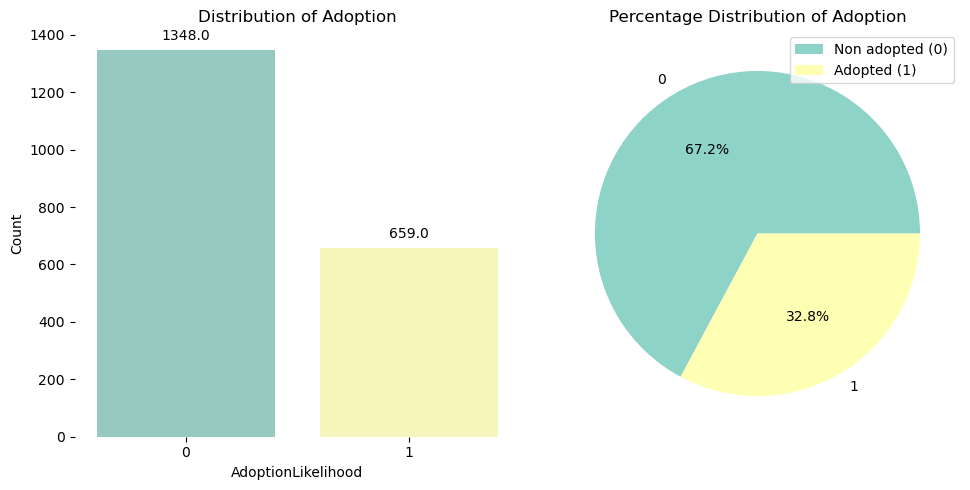

In [16]:
# adopted vs non-adopted
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 5))

exited_counts = df['AdoptionLikelihood'].value_counts()
sns.barplot(x = exited_counts.index, y = exited_counts, hue = exited_counts.index, ax = axes[0],
            palette = 'Set3', legend = False)
axes[0].set_title('Distribution of Adoption')
axes[0].set_ylabel('Count')

for p in axes[0].patches: 
    axes[0].annotate(f'{p.get_height()}',
                     (p.get_x() + p.get_width() / 2, p.get_height()),
                     ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
sns.despine(left = True, bottom = True)

exited_percentage = df['AdoptionLikelihood'].value_counts(normalize = True) * 100
axes[1].pie(exited_percentage, labels = exited_percentage.index, autopct='%1.1f%%', 
            colors = sns.color_palette('Set3'))
axes[1].set_title('Percentage Distribution of Adoption')
plt.legend(['Non adopted (0)', 'Adopted (1)'])
plt.tight_layout()
plt.show()

In [17]:
# distribution of categorical variables
def plot_categorical_distribution(column_name, data = df):
    plt.figure(figsize = (8, 4))
    plt.subplot(1, 2, 1)
    sns.countplot(y = column_name, data = df, hue = column_name, palette = 'Set2', legend = False)
    plt.title(f'Distribution of {column_name}')

    ax = plt.gca()
    for p in ax.patches:
        ax.annotate(f'{int(p.get_width())}', (p.get_width(), p.get_y() + p.get_height() / 2),
                    ha = 'center', va = 'center', xytext = (10, 0), textcoords = 'offset points')

    sns.despine(left = True, bottom = True)

    plt.subplot(1, 2, 2)
    df[column_name].value_counts().plot.pie(autopct = '%1.1f%%', colors = sns.color_palette('Set2'), 
    startangle = 90, explode = [0.05]*df[column_name].nunique())
    plt.title(f'Percentage distribution of {column_name}')
    plt.ylabel('')
    plt.tight_layout()
    plt.show()

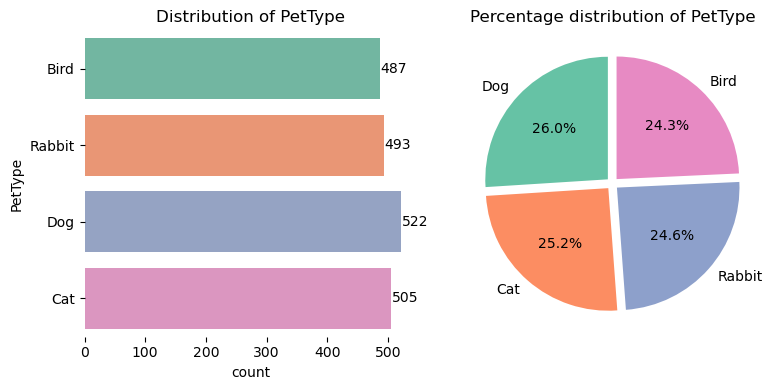

In [18]:
plot_categorical_distribution('PetType')

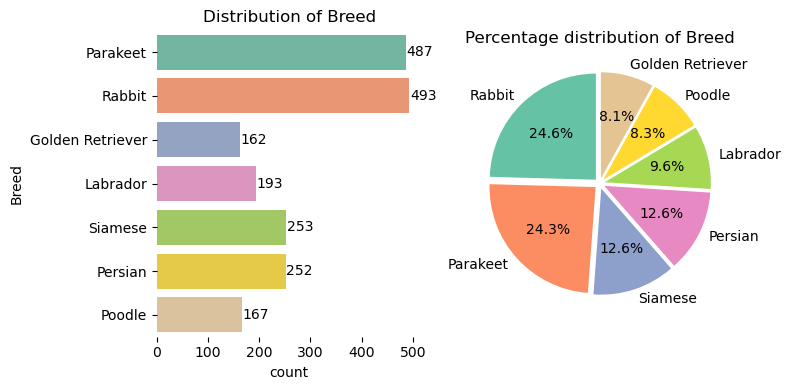

In [19]:
plot_categorical_distribution('Breed')

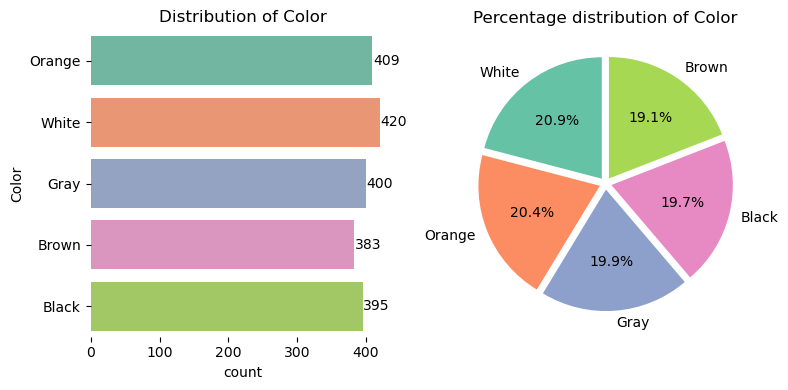

In [20]:
plot_categorical_distribution('Color')

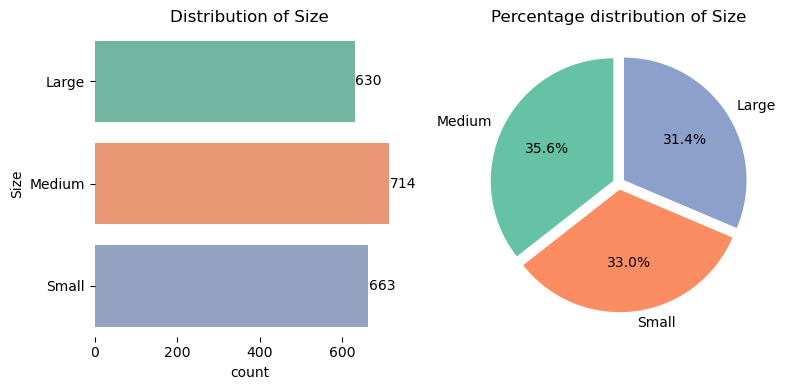

In [21]:
plot_categorical_distribution('Size')

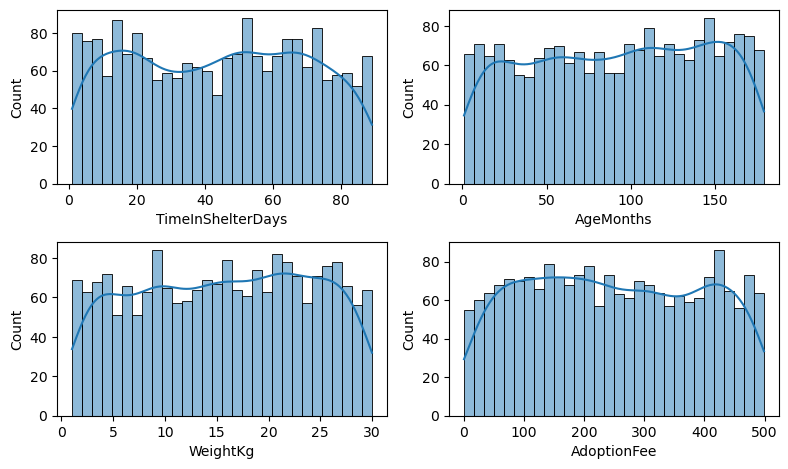

In [22]:
# histograms for numerical columns
def histogram_analysis(data, columns):
    plt.figure(figsize=(8, 9))

    for i, column in enumerate(columns, 1):
        plt.subplot(4, 2, i)
        sns.histplot(data[column], bins = 30, kde = True)

    plt.tight_layout()
    plt.show()

columns_to_analyze = ['TimeInShelterDays', 'AgeMonths', 'WeightKg', 'AdoptionFee']

histogram_analysis(df, columns_to_analyze)

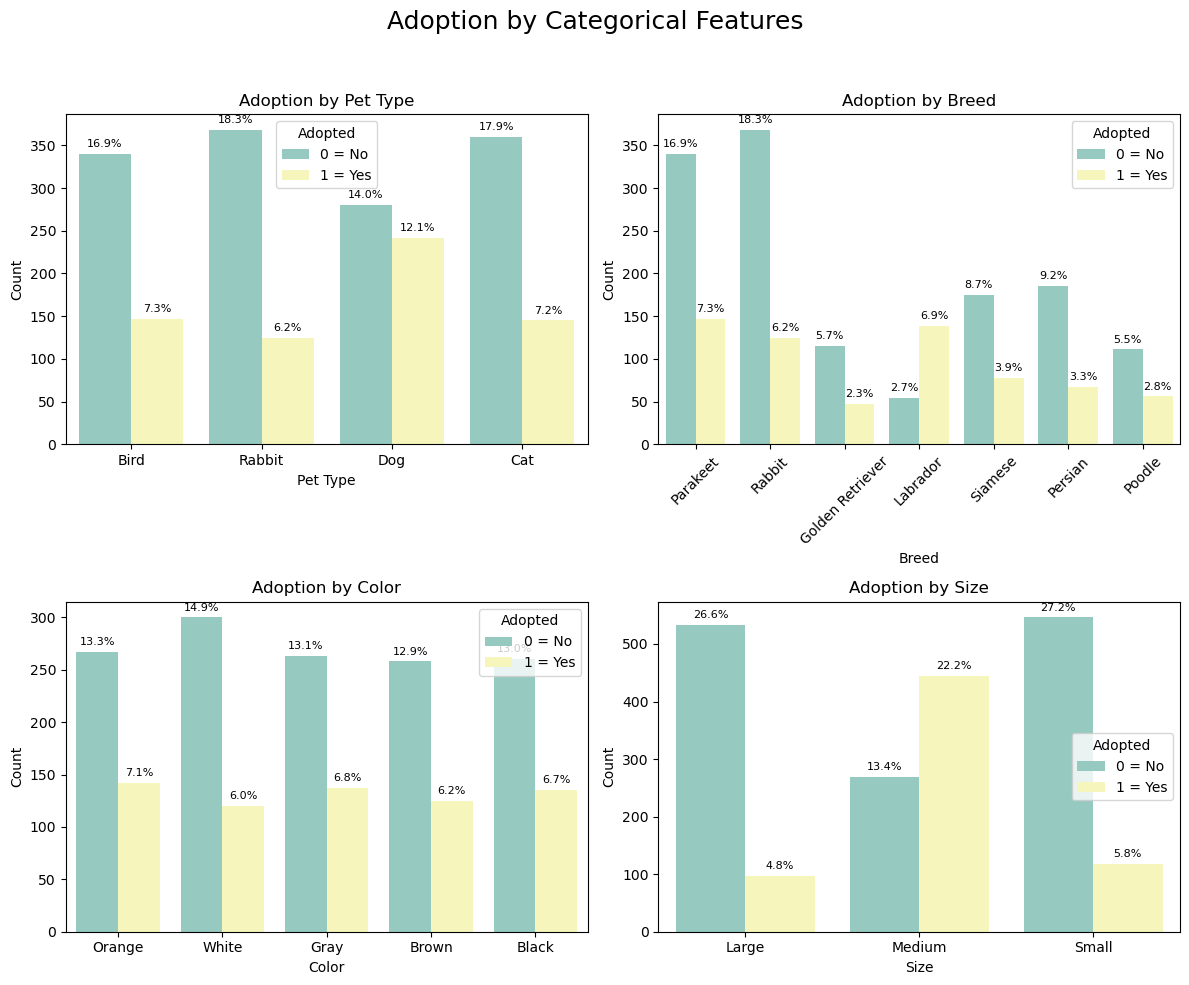

In [23]:
# adoption by categorical features
fig, axes = plt.subplots(2, 2, figsize = (12, 10))
fig.suptitle('Adoption by Categorical Features', fontsize = 18)

def add_percentages(ax):
    total = sum([p.get_height() for p in ax.patches])
    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            percentage = f'{100 * p.get_height() / total:.1f}%'
            ax.annotate(percentage,
                        (p.get_x() + p.get_width() /2., p.get_height()), 
                        ha = 'center', va = 'baseline', fontsize = 8, color = 'black', 
                        xytext = (0, 5), textcoords = 'offset points')

# PetType vs Adoption
ax1 = sns.countplot(data = df, x = 'PetType', hue = 'AdoptionLikelihood', ax = axes[0, 0], palette = 'Set3')
axes[0, 0].set_title('Adoption by Pet Type')
axes[0, 0].set_xlabel('Pet Type')
axes[0, 0].set_ylabel('Count')
axes[0, 0].legend(title = 'Adopted', labels = ['0 = No', '1 = Yes'])
add_percentages(ax1)

# Breed vs Adoption 
ax2 = sns.countplot(data = df, x = 'Breed', hue = 'AdoptionLikelihood', ax = axes[0, 1], palette = 'Set3')
axes[0, 1].set_title('Adoption by Breed')
axes[0, 1].set_xlabel('Breed')
axes[0, 1].set_ylabel('Count')
axes[0, 1].legend(title = 'Adopted', labels = ['0 = No', '1 = Yes'])
axes[0, 1].tick_params(axis = 'x', rotation = 45)
add_percentages(ax2)

# Color vs Adoption
ax3 = sns.countplot(data = df, x = 'Color', hue = 'AdoptionLikelihood', ax = axes[1, 0], palette = 'Set3')
axes[1, 0].set_title('Adoption by Color')
axes[1, 0].set_xlabel('Color')
axes[1, 0].set_ylabel('Count')
axes[1, 0].legend(title = 'Adopted', labels = ['0 = No', '1 = Yes'])
add_percentages(ax3)

# Size vs Adoption
ax4 = sns.countplot(data = df, x = 'Size', hue = 'AdoptionLikelihood', ax = axes[1, 1], palette = 'Set3')
axes[1, 1].set_title('Adoption by Size')
axes[1, 1].set_xlabel('Size')
axes[1, 1].set_ylabel('Count')
axes[1, 1].legend(title = 'Adopted', labels = ['0 = No', '1 = Yes'])
add_percentages(ax4)

plt.tight_layout(rect = [0, 0, 1, 0.95])
plt.show()

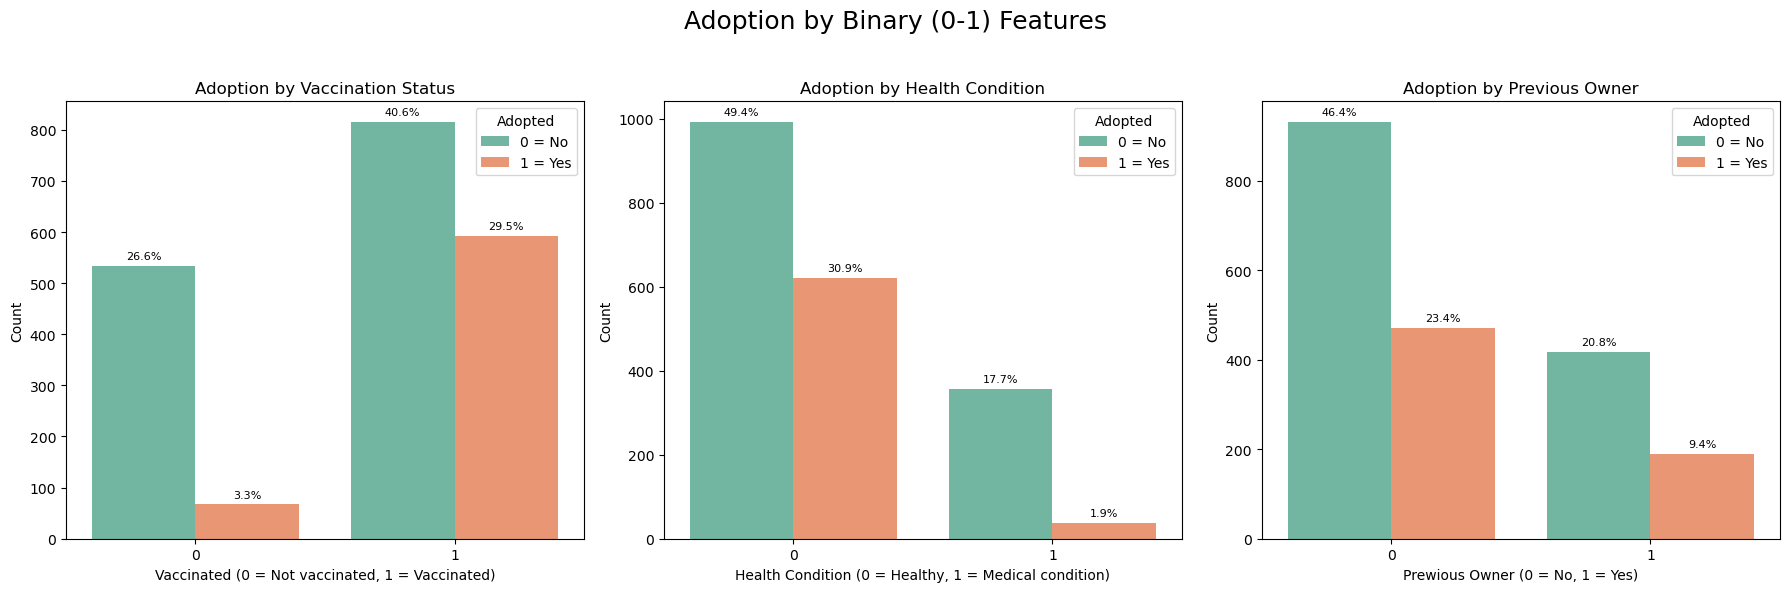

In [24]:
# adoption by Binary (0-1) features
fig, axes = plt.subplots(1, 3, figsize = (18, 6))
fig.suptitle('Adoption by Binary (0-1) Features', fontsize = 18)

def add_percentages(ax):
    total = sum([p.get_height() for p in ax.patches])
    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            percentage = f'{100 * p.get_height() / total:.1f}%'
            ax.annotate(percentage,
                        (p.get_x() + p.get_width() /2., p.get_height()), 
                        ha = 'center', va = 'baseline', fontsize = 8, color = 'black', 
                        xytext = (0, 5), textcoords = 'offset points')

# Vaccinated vs Adoption
ax1 = sns.countplot(data = df, x = 'Vaccinated', hue = 'AdoptionLikelihood', ax = axes[0], palette = 'Set2')
axes[0].set_title('Adoption by Vaccination Status')
axes[0].set_xlabel('Vaccinated (0 = Not vaccinated, 1 = Vaccinated)')
axes[0].set_ylabel('Count')
axes[0].legend(title = 'Adopted', labels = ['0 = No', '1 = Yes'])
add_percentages(ax1)

# HealthCondition vs Adoption 
ax2 = sns.countplot(data = df, x = 'HealthCondition', hue = 'AdoptionLikelihood', ax = axes[1], palette = 'Set2')
axes[1].set_title('Adoption by Health Condition')
axes[1].set_xlabel('Health Condition (0 = Healthy, 1 = Medical condition)')
axes[1].set_ylabel('Count')
axes[1].legend(title = 'Adopted', labels = ['0 = No', '1 = Yes'])
add_percentages(ax2)

# PreviousOwner vs Adoption
ax3 = sns.countplot(data = df, x = 'PreviousOwner', hue = 'AdoptionLikelihood', ax = axes[2], palette = 'Set2')
axes[2].set_title('Adoption by Previous Owner')
axes[2].set_xlabel('Prewious Owner (0 = No, 1 = Yes)')
axes[2].set_ylabel('Count')
axes[2].legend(title = 'Adopted', labels = ['0 = No', '1 = Yes'])
add_percentages(ax3)

plt.tight_layout(rect = [0, 0, 1, 0.95])
plt.show()

In [25]:
# adpotion in categories status
def plot_catplot_with_annotations(binary_column, data = df):
    g = sns.catplot(data = df, x = 'PetType', hue = 'AdoptionLikelihood', col = binary_column, 
                    kind = 'count', height = 5, aspect = 1.2, palette = 'Set3', legend = False)
    g.set_axis_labels('Pet Type', 'Count')
    g.set_titles(f'{binary_column}: {{col_name}}')

    for ax in g.axes.flat:
        for p in ax.patches:
            ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() /2., p.get_height()),
                        ha = 'center', va = 'baseline', fontsize = 10, color = 'black', 
                        xytext = (0, 5), textcoords = 'offset points')

    plt.legend(title = 'Adoption', loc = 'upper right', 
               labels = ['0 - Not adopted', '1 - Adopted'], bbox_to_anchor = (1.15, 1))
    plt.show()

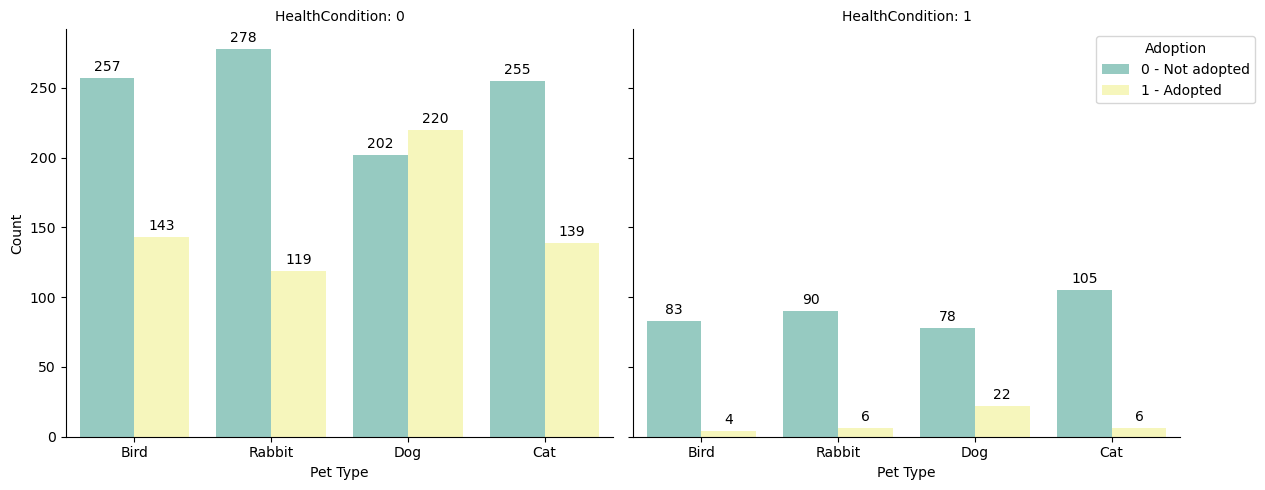

In [26]:
plot_catplot_with_annotations('HealthCondition')

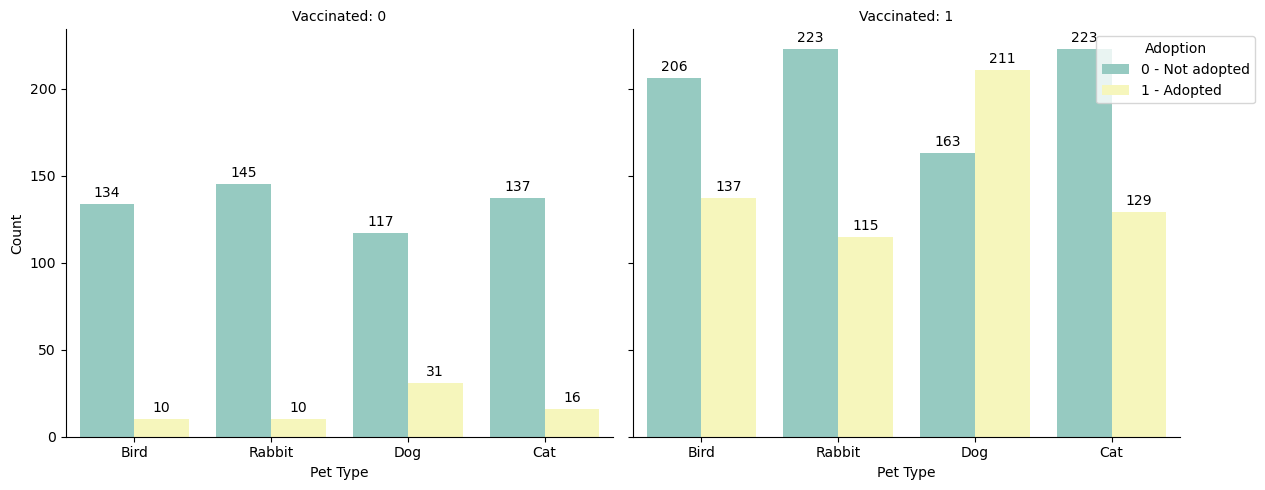

In [27]:
plot_catplot_with_annotations('Vaccinated')

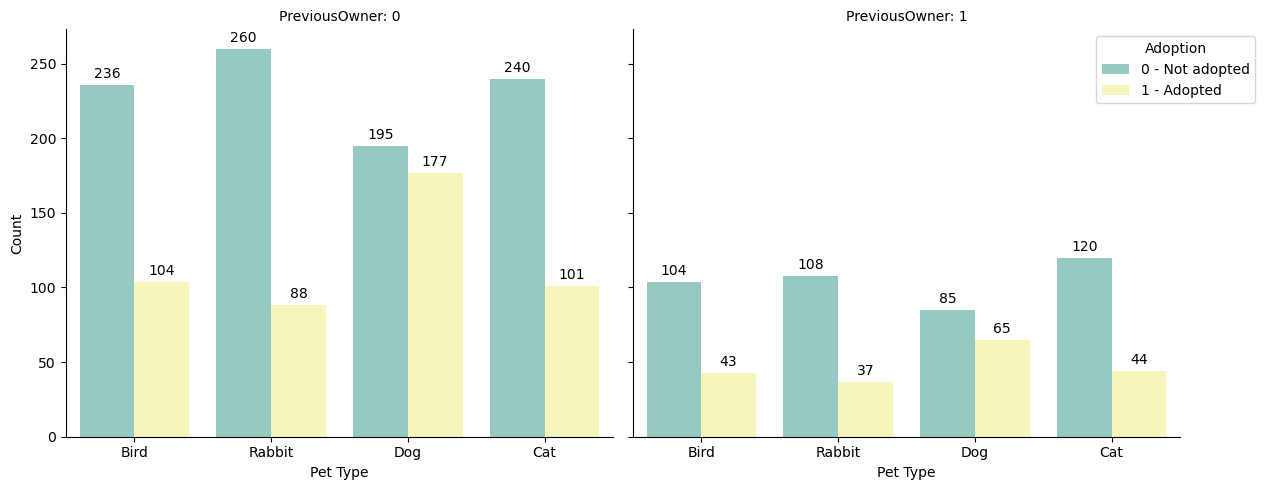

In [28]:
plot_catplot_with_annotations('PreviousOwner')

In [29]:
# feature encoding

"""
One-Hot Encoding (OHE) zamiast Label Encoding:
- unikanie porządkowowści (nie występuje tu nadrzędność między kolejnymi kategoriami zmiennej)
- lepsza interpretacja dla modeli liniowych -> 
    -> możliwość traktowania każdej kategorii jako osobnego, niezależnego czynnika
- dobre wspołdziałanie z większością algorytmów ML
- nikanie błędnej interpretacji wag w modelach liniowych

Wady OHE:
- znaczne zwiększenie liczby kolumn, gdy zmienne kategorialne mają bardzo dużo unikalnych wartości ->
    -> prowadzi to do problemu wymiarowości
"""


'\nOne-Hot Encoding (OHE) zamiast Label Encoding:\n- unikanie porządkowowści (nie występuje tu nadrzędność między kolejnymi kategoriami zmiennej)\n- lepsza interpretacja dla modeli liniowych -> \n    -> możliwość traktowania każdej kategorii jako osobnego, niezależnego czynnika\n- dobre wspołdziałanie z większością algorytmów ML\n- nikanie błędnej interpretacji wag w modelach liniowych\n\nWady OHE:\n- znaczne zwiększenie liczby kolumn, gdy zmienne kategorialne mają bardzo dużo unikalnych wartości ->\n    -> prowadzi to do problemu wymiarowości\n'

In [30]:
# apply One-Hot Encoding for 'PetType', 'Breed' and 'Color'
df_encoded = pd.get_dummies(df, columns = ['PetType', 'Breed', 'Color'], drop_first = True)

# mapping 'Size' with an ordinal scale 
size_mapping = {'Small': 0, 'Medium': 1, 'Large': 2}
df_encoded['Size_Encoded'] = df['Size'].map(size_mapping)

# droping the original 'Size' column as it has been encoded
df_encoded.drop('Size', axis = 1, inplace = True)

# dispaly of the few first rows of the transformed dataset
df_encoded.head()

,PetID,AgeMonths,WeightKg,Vaccinated,HealthCondition,TimeInShelterDays,AdoptionFee,PreviousOwner,AdoptionLikelihood,PetType_Cat,...,Breed_Parakeet,Breed_Persian,Breed_Poodle,Breed_Rabbit,Breed_Siamese,Color_Brown,Color_Gray,Color_Orange,Color_White,Size_Encoded
0,500,131,5.039768,1,0,27,140,0,0,False,...,True,False,False,False,False,False,False,True,False,2
1,501,73,16.086727,0,0,8,235,0,0,False,...,False,False,False,True,False,False,False,False,True,2
2,502,136,2.076286,0,0,85,385,0,0,False,...,False,False,False,False,False,False,False,True,False,1
3,503,97,3.339423,0,0,61,217,1,0,False,...,True,False,False,False,False,False,False,False,True,0
4,504,123,20.498100,0,0,28,14,1,0,False,...,False,False,False,True,False,False,True,False,False,2


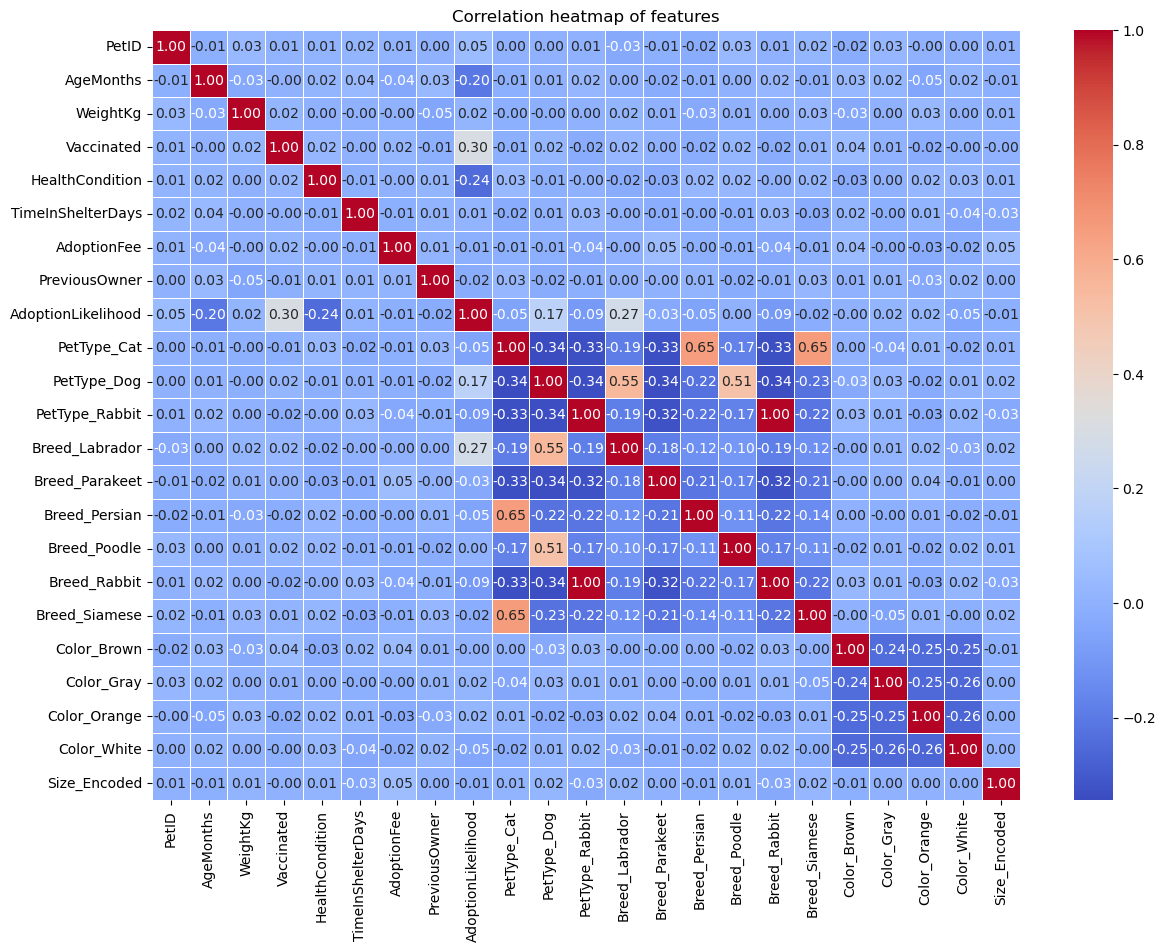

In [31]:
# correlation analysis
plt.figure(figsize = (14, 10))
correlation_matrix = df_encoded.corr()
sns.heatmap(correlation_matrix, annot = True, fmt = '.2f', cmap = 'coolwarm', linewidths = 0.5)
plt.title('Correlation heatmap of features')
plt.show()

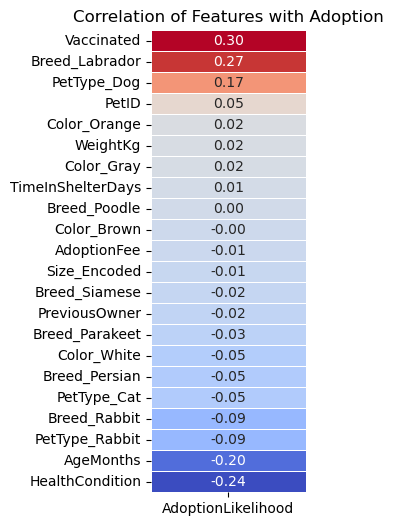

In [32]:
# correlation of Features with Adoption
targeted_correlations = correlation_matrix[['AdoptionLikelihood']].drop('AdoptionLikelihood').sort_values(by = 'AdoptionLikelihood', 
                                            ascending = False)

plt.figure(figsize = (2, 6))
sns.heatmap(targeted_correlations, annot = True, cmap = 'coolwarm', fmt = '.2f', linewidths = 0.5, cbar = False)
plt.title('Correlation of Features with Adoption')
plt.show()